# Проект 4 Поиск лучшего тарифа для Телеком компании

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
calls = pd.read_csv ('/datasets/calls.csv')
internet = pd.read_csv ('/datasets/internet.csv')
messages = pd.read_csv ('/datasets/messages.csv')
tariffs = pd.read_csv ('/datasets/tariffs.csv')
users = pd.read_csv ('/datasets/users.csv')

# 1.1 Работа с calls

In [2]:
import numpy as np

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

calls['rounded_duration'] = calls['duration']
calls['rounded_duration'] = calls['duration'].apply(np.ceil)

zero_duration_data = calls.loc[calls['rounded_duration']==0]
calls.loc[zero_duration_data.index,'rounded_duration'] = calls['rounded_duration'].median() 
calls['rounded_duration'] = calls['rounded_duration'].astype('int')

In [3]:
calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id                  202607 non-null object
call_date           202607 non-null datetime64[ns]
duration            202607 non-null float64
user_id             202607 non-null int64
month               202607 non-null int64
rounded_duration    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.3+ MB


,id,call_date,duration,user_id,month,rounded_duration
0,1000_0,2018-07-25,0.00,1000,7,6
1,1000_1,2018-08-17,0.00,1000,8,6
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1
202603,1499_216,2018-10-18,18.83,1499,10,19
202604,1499_217,2018-11-10,10.81,1499,11,11
202605,1499_218,2018-10-06,4.27,1499,10,5


id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

In [4]:
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'rounded_duration', aggfunc = 'sum', fill_value = 0)
calls_pivot.reset_index(inplace=True)
calls_pivot.columns = ['user_id','month','rounded_duration']

# 1.2 Работа с internet

In [5]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['rounded_mb_used'] = internet['mb_used'].apply(np.ceil)

#zero_internet_data = internet.loc[internet['rounded_mb_used']==0]
#internet.loc[zero_internet_data.index,'rounded_mb_used'] = internet['rounded_mb_used'].median()

internet['rounded_mb_used'] = internet['rounded_mb_used'].astype('int')

In [6]:
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id                 149396 non-null object
mb_used            149396 non-null float64
session_date       149396 non-null datetime64[ns]
user_id            149396 non-null int64
month              149396 non-null int64
rounded_mb_used    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


,id,mb_used,session_date,user_id,month,rounded_mb_used
0,1000_0,112.95,2018-11-25,1000,11,113
1,1000_1,1052.81,2018-09-07,1000,9,1053
2,1000_2,1197.26,2018-06-25,1000,6,1198
3,1000_3,550.27,2018-08-22,1000,8,551
4,1000_4,302.56,2018-09-24,1000,9,303
...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10,319
149392,1499_153,490.13,2018-12-14,1499,12,491
149393,1499_154,0.00,2018-10-27,1499,10,0
149394,1499_155,1246.32,2018-11-26,1499,11,1247


id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

In [7]:
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'rounded_mb_used', aggfunc = 'sum', fill_value = 0)
internet_pivot.reset_index(inplace=True)
internet_pivot.columns = ['user_id','month','rounded_mb_used']

user_month_data = calls_pivot.merge(internet_pivot, on=['user_id', 'month'], how='outer')

# 1.3 Работа с messages

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [9]:
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

In [10]:
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count', fill_value = 0)
messages_pivot.reset_index(inplace=True)
messages_pivot.columns = ['user_id','month','count_messages']

user_month_data = user_month_data.merge(messages_pivot, on=['user_id', 'month'], how='outer')

# 1.4 Работа с users

In [11]:
# Менять типы не требуется, так как для нашего анализа - они не нужны
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

In [12]:
users_pivot = pd.DataFrame()
users_pivot['user_id'] = users['user_id']
users_pivot['tariff'] = users['tariff']
users_pivot['city'] = users['city']

user_month_data = user_month_data.merge(users_pivot, on=['user_id'], how='outer')

# 1.5 Работа с tariffs

In [13]:
#tariffs.info()
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

rub_monthly_fee — ежемесячная абонентская плата в рублях

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

tariff_name — название тарифа

# Описание тарифов:

# Тариф «Смарт»
Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

# Тариф «Ультра»
Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

# Шаг 2. Подготовьте данные
Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных.

Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.

Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [14]:
user_month_data

,user_id,month,rounded_duration,rounded_mb_used,count_messages,tariff,city
0,1000,5.0,189.0,2256.0,22.0,ultra,Краснодар
1,1000,6.0,262.0,23257.0,60.0,ultra,Краснодар
2,1000,7.0,376.0,14016.0,75.0,ultra,Краснодар
3,1000,8.0,468.0,14070.0,81.0,ultra,Краснодар
4,1000,9.0,538.0,14581.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,19588.0,21.0,smart,Санкт-Петербург
3212,1489,11.0,NaN,17516.0,20.0,smart,Санкт-Петербург
3213,1489,12.0,NaN,17341.0,35.0,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,ultra,Волжский


In [15]:
def add_revenue_duration(user_month_data):
    rounded_duration = user_month_data['rounded_duration']
    tariff = user_month_data['tariff']
    if tariff == 'smart' and rounded_duration > 500: 
        revenue_duration = (rounded_duration - 500)*3
    if tariff == 'ultra' and rounded_duration > 3000: 
        revenue_duration = (rounded_duration - 3000)*1
    else: 
        revenue_duration = 0
    return revenue_duration
user_month_data['revenue_duration'] = user_month_data.apply(add_revenue_duration, axis=1)

In [16]:
# надо не забыть округлить
def add_revenue_internet(user_month_data):
    mb_used = user_month_data['rounded_mb_used']
    tariff = user_month_data['tariff']
    if tariff == 'smart' and mb_used > 15360: 
        revenue_internet = (mb_used - 15360)*200
    if tariff == 'ultra' and mb_used > 30720: 
        revenue_internet = (mb_used - 30720)*150
    else: 
        revenue_internet = 0
    return revenue_internet
user_month_data['revenue_internet'] = user_month_data.apply(add_revenue_internet, axis=1)

In [17]:
def add_revenue_messages(user_month_data):
    count_messages = user_month_data['count_messages']
    tariff = user_month_data['tariff']
    if tariff == 'smart' and count_messages > 50: 
        revenue_messages = (count_messages-50)*3
    if tariff == 'ultra' and count_messages > 1000: 
        revenue_messages = (count_messages-1000)*1
    else: 
        revenue_messages = 0
    return revenue_messages
user_month_data['revenue_messages'] = user_month_data.apply(add_revenue_messages, axis=1)

In [18]:
def add_revenue_total(user_month_data):
    tariff = user_month_data['tariff']
    revenue_duration = user_month_data['revenue_duration']
    revenue_internet = user_month_data['revenue_internet']
    revenue_messages = user_month_data['revenue_messages']
    if tariff == 'smart': revenue_tariff = 550
    if tariff == 'ultra': revenue_tariff = 1950
    revenue_total = revenue_tariff + revenue_duration + revenue_internet + revenue_messages
    return revenue_total
user_month_data['revenue_total'] = user_month_data.apply(add_revenue_total, axis=1)

In [19]:
user_month_data

,user_id,month,rounded_duration,rounded_mb_used,count_messages,tariff,city,revenue_duration,revenue_internet,revenue_messages,revenue_total
0,1000,5.0,189.0,2256.0,22.0,ultra,Краснодар,0,0.0,0,1950.0
1,1000,6.0,262.0,23257.0,60.0,ultra,Краснодар,0,0.0,0,1950.0
2,1000,7.0,376.0,14016.0,75.0,ultra,Краснодар,0,0.0,0,1950.0
3,1000,8.0,468.0,14070.0,81.0,ultra,Краснодар,0,0.0,0,1950.0
4,1000,9.0,538.0,14581.0,57.0,ultra,Краснодар,0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,19588.0,21.0,smart,Санкт-Петербург,0,0.0,0,550.0
3212,1489,11.0,NaN,17516.0,20.0,smart,Санкт-Петербург,0,0.0,0,550.0
3213,1489,12.0,NaN,17341.0,35.0,smart,Санкт-Петербург,0,0.0,0,550.0
3214,1128,NaN,NaN,NaN,NaN,ultra,Волжский,0,0.0,0,1950.0


# Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки.
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [20]:
smart_data = user_month_data.loc[user_month_data['tariff']=='smart']
ultra_data = user_month_data.loc[user_month_data['tariff']=='ultra']

import matplotlib.pyplot as plt

# IQR = Q 3 - Q 1
#Q1-3*IQR до Q3+3*IQR
# Сделаем функцию для создания графиков:

def print_hist(data,columns):
    median = data[columns].median()
    Q1 = data.loc[data[columns]<median][columns].median()
    Q3 = data.loc[data[columns]>median][columns].median()
    IQR = Q3-Q1
    data[columns].hist(bins=30,range=(Q1-3*IQR, Q3+3*IQR ))
    plt.show()
#

# Иследование использования минут разговора на разных тарифах

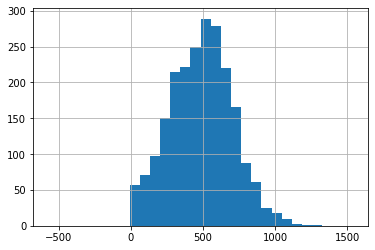

count    2223.000000
mean      488.345029
std       217.493636
min         2.000000
25%       333.000000
50%       496.000000
75%       633.500000
max      1651.000000
Name: rounded_duration, dtype: float64

In [21]:
print_hist(smart_data,'rounded_duration')
smart_data['rounded_duration'].describe()

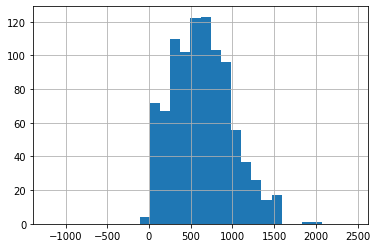

count     951.000000
mean      633.425868
std       354.607140
min         1.000000
25%       362.500000
50%       618.000000
75%       878.500000
max      1997.000000
Name: rounded_duration, dtype: float64

In [22]:
print_hist(ultra_data,'rounded_duration')
ultra_data['rounded_duration'].describe()

# Иследование использования сообщений на разных тарифах

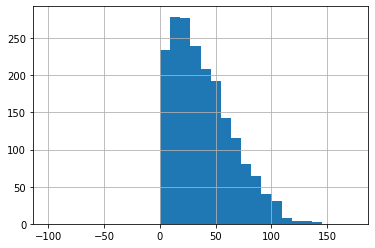

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count_messages, dtype: float64

In [23]:
print_hist(smart_data,'count_messages')
smart_data['count_messages'].describe()

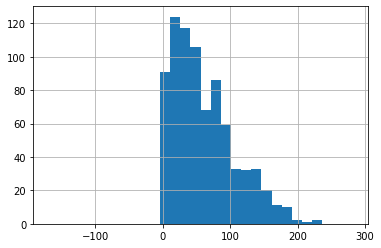

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: count_messages, dtype: float64

In [24]:
print_hist(ultra_data,'count_messages')
ultra_data['count_messages'].describe()

# Иследование использования интернета на разных тарифах

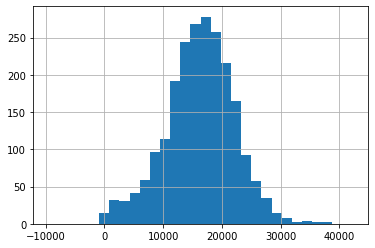

count     2228.000000
mean     16236.472621
std       5868.824472
min          0.000000
25%      12668.500000
50%      16532.000000
75%      20068.000000
max      38610.000000
Name: rounded_mb_used, dtype: float64

In [25]:
print_hist(smart_data,'rounded_mb_used')
smart_data['rounded_mb_used'].describe()

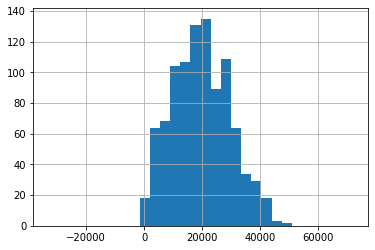

count      975.000000
mean     19686.767179
std       9952.057054
min          0.000000
25%      12020.500000
50%      19411.000000
75%      26920.500000
max      49789.000000
Name: rounded_mb_used, dtype: float64

In [26]:
print_hist(ultra_data,'rounded_mb_used')
ultra_data['rounded_mb_used'].describe()

# Вывод шага 3:

В целом тариф "ultra" выбирают клиенты, которые разговаривают больше, пишут больше СМС и больше используют интерернет

# Шаг 4. Проверьте гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.

# Проверка того, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [27]:
from scipy import stats as st
import numpy as np

pages_per_session_autumn = smart_data['revenue_total']
pages_per_session_summer = ultra_data['revenue_total']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    pages_per_session_autumn, 
    pages_per_session_summer) 

print('p-значение:' , results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу, выручка различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, выручка одинаковая")

p-значение: 3.7905713175773864e-48
Отвергаем нулевую гипотезу, выручка различается


In [30]:
print('Средняя выручка от клиента с тарифом Смарт =', smart_data['revenue_total'].mean())
print('Средняя выручка от клиента с тарифом Ультра =', ultra_data['revenue_total'].mean())

Средняя выручка от клиента с тарифом Смарт = 550.0
Средняя выручка от клиента с тарифом Ультра = 115017.90060851927


# Проверка того, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [29]:
msk_data = user_month_data.loc[user_month_data['city']=='Москва']
dont_msk_data = user_month_data.loc[user_month_data['city']!='Москва']

from scipy import stats as st
import numpy as np

pages_per_session_autumn = msk_data['revenue_total']
pages_per_session_summer = dont_msk_data['revenue_total']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    pages_per_session_autumn, 
    pages_per_session_summer) 

print('p-значение:' , results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу, выручка различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, выручка одинаковая")

p-значение: 0.27651262356795975
Не получилось отвергнуть нулевую гипотезу, выручка одинаковая


# Вывод из гипотиз:

Так как у нас нет генеральной совокупности, а есть выборка из тарифа "Смарт" и выборка из тарифа "Ультра",
у нас есть возможности проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

И в качестве нулевой гепотезы - мы взяли эту гепотизу.

# Шаг 5. Напишите общий вывод

Мы провели обширный анализ, сравнили сколько в среднем тратят: минут, смс, мегабайт интернета - клиенты с разными тарифами.
На основании этого анализа - мы заключили, что клиенты с более догорим тарифам в среднем больше используют услуги телеком компании

Мы выдвинули и опровергнули теорию о равенстве средней выручки двух тарифах. Клиенты с тарифом "Ультра" приносят больше выручки, исходя из анализа средней выручки разных тарифах по выбороке.

В тоже время, мы выдвинули гипотизу, о равенстве выручки от клиентов из Москвы и других городов - и нам удалось подтвердить гипотизу.